# 5.1 Introduction to pandas Data Structures

## Series

A Series is a **one-dimensional array-like object containing a sequence of values (of similar types to NumPy types) and an associated array of data labels, called its index**

The simplest Series is formed from only an array of data:

In [2]:
import pandas as pd

In [3]:
obj = pd.Series([4, 7, -5, 3])

In [4]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

The string representation of a Series displayed interactively shows the **index on the left and the values on the right**

Since we did not specify an index for the data, a default one consisting of the integers 0 through N - 1

You can get the array representation and index object of the Series via its values and index attributes, respectively:

In [5]:
obj.values

array([ 4,  7, -5,  3])

In [6]:
obj.index

RangeIndex(start=0, stop=4, step=1)

Often it will be desirable to create a Series with an index identifying each data point with a label:

In [7]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])

In [8]:
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [9]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

Compared with NumPy arrays, **you can use labels in the index when selecting single values or a set of values**:

In [10]:
obj2['a']

-5

In [11]:
obj2['d']

4

In [12]:
obj2[['c', 'a', 'd']]

c    3
a   -5
d    4
dtype: int64

Here ['c', 'a', 'd'] is interpreted as a list of indices, even though it contains strings instead of integers

Using NumPy functions or NumPy-like operations, such as filtering with a boolean array, scalar multiplication, or applying math functions, will preserve the index-value link:

In [13]:
obj2[obj2 > 0]

d    4
b    7
c    3
dtype: int64

In [14]:
obj2 * 2

d     8
b    14
a   -10
c     6
dtype: int64

In [15]:
import numpy as np
np.exp(obj2)

d      54.598150
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

Another way to think about a Series is as a fixed-length, ordered dict, as it is a mapping of index values to data values

It can be used in many contexts where you might use a dict:

In [16]:
'b' in obj2

True

In [17]:
'e' in obj2

False

Should you have data contained in a Python dict, you can **create a Series from it by passing the dict**:

In [18]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}

In [19]:
obj3 = pd.Series(sdata)

In [20]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

When you are only passing a dict, the index in the resulting Series will have the dict’s keys in sorted order

You can override this by passing the dict keys in the order you want them to appear in the resulting Series:

In [21]:
states = ['California', 'Ohio', 'Oregon', 'Texas']

In [22]:
obj4 = pd.Series(sdata, index=states)

In [23]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

Here, three values found in sdata were placed in the appropriate locations, but since no value for 'California' was found, it appears as NaN (not a number), which is considered in pandas to mark missing or NA values

Since 'Utah' was not included in states, it is excluded from the resulting object

**The isnull and notnull functions in pandas should be used to detect missing data:**

In [24]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [25]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

Series also has these as instance methods:

In [26]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

A useful Series feature for many applications is that it automatically aligns by index label in arithmetic operations:

In [27]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [28]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [29]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

Both the Series object itself and its index have a name attribute, which integrates with other key areas of pandas functionality:

In [30]:
obj4.name = 'population'

In [31]:
obj4.index.name = 'state'

In [32]:
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

A Series’s index can be altered in-place by assignment:

In [33]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [34]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']

In [35]:
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

## DataFrame

A DataFrame represents a rectangular table of data and contains an ordered collection of columns, each of which can be a different value type

The DataFrame has both a row and column index; it can be thought of as a dict of Series all sharing the same index

Under the hood, **the data is stored as one or more two-dimensional blocks** rather than a list, dict, or some other collection of one-dimensional arrays

There are many ways to construct a DataFrame, though one of the most common is **from a dict of equal-length lists or NumPy arrays**:

In [36]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
'year': [2000, 2001, 2002, 2001, 2002, 2003],
'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [37]:
frame = pd.DataFrame(data)

The resulting DataFrame will have its index assigned automatically as with Series, and the columns are placed in sorted order:

In [38]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


For large DataFrames, the head method selects only the first five rows:

In [39]:
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


If you specify a sequence of columns, the DataFrame’s columns will be arranged in that order:

In [40]:
pd.DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


If you pass a column that isn’t contained in the dict, it will appear with missing values in the result:

In [41]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four',
                      'five', 'six'])

In [42]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [43]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

A column in a DataFrame can be retrieved as a Series either by dict-like notation or by attribute:

In [44]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [45]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

Note that the returned Series have the same index as the DataFrame, and their name attribute has been appropriately set

Rows can also be retrieved by position or name with the special loc attribute:

In [46]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

Columns can be modified by assignment. For example, the empty 'debt' column could be assigned a scalar value or an array of values:

In [47]:
frame2['debt'] = 16.5

In [48]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [49]:
frame2['debt'] = np.arange(6.)

In [50]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


When you are assigning lists or arrays to a column, the value’s length must match the length of the DataFrame

If you assign a Series, its labels will be realigned exactly to the DataFrame’s index, inserting missing values in any holes:

In [51]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])

In [52]:
frame2['debt'] = val

In [53]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


Assigning a column that doesn’t exist will create a new column. The del keyword will delete columns as with a dict

As an example of del, I first add a new column of boolean values where the state column equals ' Ohio':

In [54]:
frame2['eastern'] = frame2.state == 'Ohio'

In [55]:
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


The del method can then be used to remove this column:

In [56]:
del frame2['eastern']

In [57]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

Another common form of data is a nested dict of dicts:

In [58]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

If the nested dict is passed to the DataFrame, pandas will interpret the outer dict keys as the columns and the inner keys as the row indices:

In [59]:
frame3 = pd.DataFrame(pop)

In [60]:
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


You can transpose the DataFrame (swap rows and columns) with similar syntax to a NumPy array:

In [61]:
frame3.T

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


The keys in the inner dicts are combined and sorted to form the index in the result. This isn’t true if an explicit index is specified:

In [62]:
pd.DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


Dicts of Series are treated in much the same way:

In [63]:
pdata = {'Ohio': frame3['Ohio'][:-1],
         'Nevada': frame3['Nevada'][:2]}

In [64]:
pd.DataFrame(pdata)

,Ohio,Nevada
2001,1.7,2.4
2002,3.6,2.9


If a DataFrame’s index and columns have their name attributes set, these will also be displayed:

In [65]:
frame3.index.name = 'year' ; frame3.columns.name = 'state'

In [66]:
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


As with Series, the values attribute returns the data contained in the DataFrame as a two-dimensional ndarray:

In [67]:
frame3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

If the DataFrame’s columns are different dtypes, the dtype of the values array will be chosen to accommodate all of the columns:

In [68]:
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

For a complete list of things you can pass the DataFrame constructor, see Table 5-1

Table 5-1. Possible data inputs to DataFrame constructor
<p align='center'>
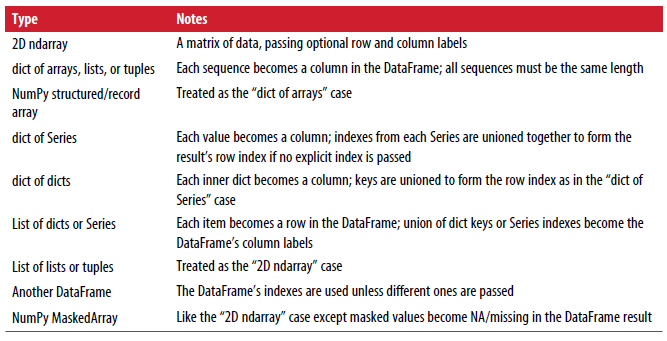
</p>

## Index Objects

pandas’s Index objects are **responsible for holding the axis labels and other metadata** (like the axis name or names)

Any array or other sequence of labels you use when constructing a Series or DataFrame is internally converted to an Index:

In [69]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])

In [70]:
index = obj.index

In [71]:
index

Index(['a', 'b', 'c'], dtype='object')

In [72]:
index[1:]

Index(['b', 'c'], dtype='object')

Index objects are immutable and thus can’t be modified by the user:

In [73]:
try:
  index[1] = 'd'
except TypeError:
  print('TypeError')

TypeError


Immutability makes it safer to share Index objects among data structures:

In [74]:
labels = pd.Index(np.arange(3))

In [75]:
labels

Int64Index([0, 1, 2], dtype='int64')

In [76]:
obj2 = pd.Series([1.5, -2.5, 0], index=labels)

In [77]:
obj2

0    1.5
1   -2.5
2    0.0
dtype: float64

In addition to being array-like, an Index also behaves like a fixed-size set:

In [78]:
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [79]:
frame3.columns

Index(['Nevada', 'Ohio'], dtype='object', name='state')

In [80]:
'Ohio' in frame3.columns

True

In [81]:
2003 in frame3.index

False

Unlike Python sets, a pandas Index can contain duplicate labels:

In [82]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])

In [83]:
dup_labels

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

Selections with duplicate labels will select all occurrences of that label

Each Index has a number of methods and properties for set logic, which answer other common questions about the data it contains. Some useful ones are summarized in Table 5-2

Table 5-2. Some Index methods and properties
<p align='center'>
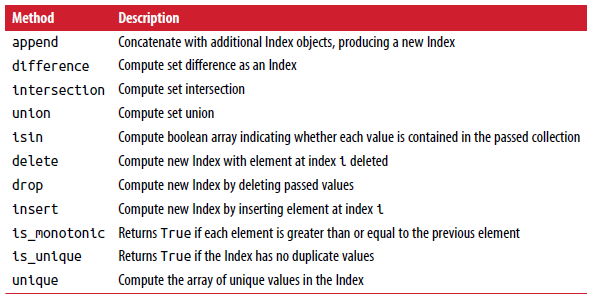
</p>

# 5.2 Essential Functionality

##Reindexing

An important method on pandas objects is reindex, which means to **create a new object with the data conformed to a new index**. Consider an example:

In [84]:
obj = pd.Series([4.5, 7.3, -5.3, 3.6], index=['d', 'b', 'a', 'c'])

In [85]:
obj

d    4.5
b    7.3
a   -5.3
c    3.6
dtype: float64

Calling reindex on this Series rearranges the data according to the new index, introducing missing values if any index values were not already present:

In [86]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])

In [87]:
obj2

a   -5.3
b    7.3
c    3.6
d    4.5
e    NaN
dtype: float64

For ordered data like time series, it may be desirable to do some interpolation or filling of values when reindexing

The method option allows us to do this, using a method such as ffill, which forward-fills the values:

In [88]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])

In [89]:
obj3

0      blue
2    purple
4    yellow
dtype: object

In [90]:
obj3.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

**With DataFrame, reindex can alter either the (row) index, columns, or both**

When passed only a sequence, it reindexes the rows in the result:

In [91]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])

In [92]:
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [93]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])

In [94]:
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


The columns can be reindexed with the columns keyword:

In [95]:
states = ['Texas', 'Utah', 'California']

In [96]:
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


See Table 5-3 for more about the arguments to reindex.

Table 5-3. reindex function arguments
<p align='center'>
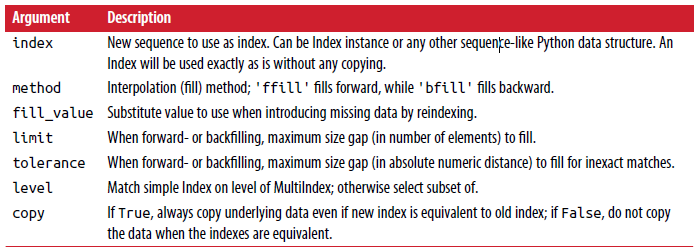
</p>

## Dropping Entries from an Axis

The drop method will return a new object with the indicated value or values deleted from an axis:

In [97]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])

In [98]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [99]:
new_obj = obj.drop('c')

In [100]:
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [101]:
obj.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

With DataFrame, index values can be deleted from either axis. To illustrate this, we first create an example DataFrame:

In [102]:
data = pd.DataFrame(np.arange(16).reshape(4, 4),
                    index=['Ohio', 'Colorado', 'Utah', 'New York',],
                    columns=['one', 'two', 'three', 'four'])

In [103]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


Calling drop with a sequence of labels will drop values from the row labels (axis 0):

In [104]:
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


You can drop values from the columns by passing axis=1 or axis= 'columns':

In [105]:
data.drop('two', axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [106]:
data.drop(['two', 'four'], axis='columns')

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


Many functions, like drop, which modify the size or shape of a Series or DataFrame, **can manipulate an object in-place without returning a new object**:

Be careful with the inplace, as it destroys any data that is dropped

In [107]:
obj.drop('c', inplace=True)

In [108]:
obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

## Indexing, Selection, and Filtering

Series indexing (obj[...]) works analogously to NumPy array indexing, except **you can use the Series’s index values instead of only integers:**



In [109]:
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])

In [110]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [111]:
obj['b']

1.0

In [112]:
obj[1]

1.0

In [113]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [114]:
obj[['b', 'a', 'd']]

b    1.0
a    0.0
d    3.0
dtype: float64

In [115]:
obj[[1, 3]]

b    1.0
d    3.0
dtype: float64

In [116]:
obj[obj < 2]

a    0.0
b    1.0
dtype: float64

Slicing with labels behaves differently than normal Python slicing in that **the end point is inclusive:**

In [117]:
obj['b':'c']

b    1.0
c    2.0
dtype: float64

Setting using these methods modifies the corresponding section of the Series:

In [118]:
obj['b':'c'] = 5

In [119]:
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

Indexing into a DataFrame is for retrieving one or more columns either with a single value or sequence:

In [120]:
data = pd.DataFrame(np.arange(16).reshape(4, 4),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])

In [121]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [122]:
data['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

In [123]:
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


Indexing like this has a few special cases. First, slicing or selecting data with a boolean array:

In [124]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [125]:
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


Another use case is in indexing with a boolean DataFrame, such as one produced by a scalar comparison:

In [126]:
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [127]:
data[data < 5] = 0

In [128]:
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


This makes DataFrame syntactically more like a two-dimensional NumPy array in this particular case

### Selection with loc and iloc

For DataFrame label-indexing on the rows, I introduce the special indexing operators loc and iloc

They enable you to **select a subset of the rows and columns from a DataFrame with NumPy-like notation** using either **axis labels (loc)** or **integers (iloc)**

In [129]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int64

We’ll then perform some similar selections with integers using iloc:

In [130]:
data.iloc[2, [3, 0, 1]]

four    11
one      8
two      9
Name: Utah, dtype: int64

In [131]:
data.iloc[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int64

In [132]:
data.iloc[[1, 2], [3, 0, 1]]

,four,one,two
Colorado,7,0,5
Utah,11,8,9


Both indexing functions work with slices in addition to single labels or lists of labels:

In [133]:
data.loc[: 'Utah', 'two']

Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int64

In [134]:
data.iloc[:, :3][data.three > 5]

,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


So there are many ways to select and rearrange the data contained in a pandas object. For DataFrame, Table 5-4 provides a short summary of many of them

Table 5-4. Indexing options with DataFrame
<p align='center'>
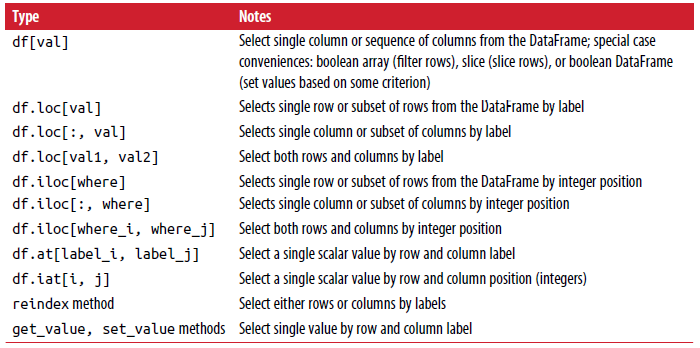
</p>

## Integer Indexes

Working with pandas objects indexed by integers is something that often trips up new users due to some differences with indexing semantics on built-in Python data structures like lists and tuples

For example, you might not expect the following code to generate an error:

In [135]:
ser = pd.Series(np.arange(3.))

In [136]:
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [137]:
try:
  ser[-1]
except (ValueError, KeyError):
  print('ValueError', 'KeyError')

ValueError KeyError


In this case, pandas could “fall back” on integer indexing, but it’s difficult to do this in general without introducing subtle bugs

Here we have an index containing 0, 1, 2, but inferring what the user wants (label-based indexing or position-based) is difficult:

In [138]:
ser

0    0.0
1    1.0
2    2.0
dtype: float64

On the other hand, with a non-integer index, there is no potential for ambiguity:

In [139]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])

In [140]:
ser2[-1]

2.0

To keep things consistent, **if you have an axis index containing integers, data selection will always be label-oriented**

For more precise handling, use loc (for labels) or iloc (for integers):

In [141]:
ser[:1]

0    0.0
dtype: float64

In [142]:
ser.loc[:1]

0    0.0
1    1.0
dtype: float64

In [143]:
ser.iloc[:1]

0    0.0
dtype: float64

## Arithmetic and Data Alignment

An important pandas feature for some applications is the behavior of arithmetic between objects with different indexes

**When you are adding together objects, if any index pairs are not the same, the respective index in the result will be the union of the index pairs**

For users with database experience, this is similar to an automatic outer join on the index labels. Let’s look at an example:

In [144]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])

In [145]:
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])

In [146]:
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [147]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

Adding these together yields:

In [148]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

The internal data alignment introduces missing values in the label locations that don’t overlap

Missing values will then propagate in further arithmetic computations

In the case of DataFrame, alignment is performed on both the rows and the columns:

In [149]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                   index=['Ohio', 'Texas', 'Colorado'])

In [150]:
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [151]:
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [152]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


Adding these together returns a DataFrame whose index and columns are the unions of the ones in each DataFrame:

In [153]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


**Since the 'c' and 'e' columns are not found in both DataFrame objects, they appear as all missing in the result**. The same holds for the rows whose labels are not common to both objects

If you add DataFrame objects with no column or row labels in common, the result will contain all nulls:


In [154]:
df1 = pd.DataFrame({'A': [1, 2]})

In [155]:
df2 = pd.DataFrame({'B': [3, 4]})

In [156]:
df1

,A
0,1
1,2


In [157]:
df2

,B
0,3
1,4


In [158]:
df1 + df2

,A,B
0,NaN,NaN
1,NaN,NaN


### Arithmetic methods with fill values

In arithmetic operations between differently indexed objects, you might want to fill with a special value, like 0, when an axis label is found in one object but not the other:

In [159]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                   columns=list('abcd'))

In [160]:
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
                   columns=list('abcde'))

In [161]:
df2.loc[1, 'b'] = np.nan

In [162]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [163]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


Adding these together results in NA values in the locations that don’t overlap:

In [164]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


Using the add method on df1, I pass df2 and an argument to fill_value:

In [165]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


See Table 5-5 for a listing of Series and DataFrame methods for arithmetic

Each of them has a counterpart, starting with the letter r, that has arguments flipped. So these two statements are equivalent:

Table 5-5. Flexible arithmetic methods
<p align='center'>
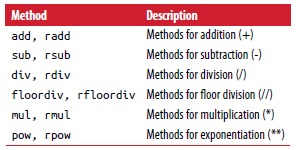
</p>

In [166]:
1 / df1

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


In [167]:
df1.rdiv(1)

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


Relatedly, when reindexing a Series or DataFrame, you can also specify a different fill value:

In [168]:
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


### Operations between DataFrame and Series

As with NumPy arrays of different dimensions, arithmetic between DataFrame and Series is also defined

First, as a motivating example, consider the difference between a two-dimensional array and one of its rows:

In [169]:
arr = np.arange(12.).reshape((3, 4))

In [170]:
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [171]:
arr[0]

array([0., 1., 2., 3.])

In [172]:
arr - arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

When we subtract arr[0] from arr, the subtraction is performed once for each row. This is referred to as broadcasting

Operations between a DataFrame and a Series are similar:



In [173]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                     columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [174]:
series = frame.iloc[0]

In [175]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [176]:
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

By default, **arithmetic between DataFrame and Series matches the index of the Series on the DataFrame’s columns, broadcasting down the rows:**

In [177]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


If an index value is not found in either the DataFrame’s columns or the Series’s index, the objects will be reindexed to form the union:

In [178]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])

In [179]:
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


**If you want to instead broadcast over the columns, matching on the rows, you have to use one of the arithmetic methods.** For example:

In [180]:
series3 = frame['d']

In [181]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [182]:
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [183]:
frame.sub(series3, axis='index')

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


The axis number that you pass is the axis to match on. In this case we mean to match on the DataFrame’s row index (axis='index' or axis= 0) and broadcast across

## Function Application and Mapping

NumPy ufuncs (element-wise array methods) also work with pandas objects:

In [184]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [185]:
frame

,b,d,e
Utah,-1.180385,-1.225518,0.629109
Ohio,0.195879,-0.755781,0.391928
Texas,0.338212,0.285092,0.662945
Oregon,-0.571896,-1.410809,-0.179497


In [186]:
np.abs(frame)

,b,d,e
Utah,1.180385,1.225518,0.629109
Ohio,0.195879,0.755781,0.391928
Texas,0.338212,0.285092,0.662945
Oregon,0.571896,1.410809,0.179497


Another frequent operation is **applying a function on one-dimensional arrays to each column or row.** DataFrame’ apply method does exactly this:

In [187]:
f = lambda x: x.max() - x.min()

In [188]:
frame.apply(f)

b    1.518598
d    1.695901
e    0.842442
dtype: float64

Here the function f, which computes the difference between the maximum and minimum of a Series, is invoked once on each column in frame

The result is a Series having the columns of frame as its index

If you pass axis='columns' to apply, the function will be invoked once per row instead:

In [189]:
frame.apply(f, axis='columns')

Utah      1.854626
Ohio      1.147710
Texas     0.377853
Oregon    1.231311
dtype: float64

Many of the most common array statistics (like sum and mean) are DataFrame methods, so using apply is not necessary

The function passed to apply need not return a scalar value; it can also return a Series with multiple values:

In [190]:
def f(x):
  return pd.Series([x.min(), x.max()], index=['min', 'max'])

In [191]:
frame.apply(f)

,b,d,e
min,-1.180385,-1.410809,-0.179497
max,0.338212,0.285092,0.662945


Element-wise Python functions can be used, too. Suppose you wanted to **compute a formatted string from each floating-point value in frame**

You can do this with apply map:




In [192]:
format = lambda x: '%.2f' % x

In [193]:
frame.applymap(format)

,b,d,e
Utah,-1.18,-1.23,0.63
Ohio,0.20,-0.76,0.39
Texas,0.34,0.29,0.66
Oregon,-0.57,-1.41,-0.18


The reason for the name applymap is that **Series has a map method for applying an element-wise function:**

In [194]:
frame['e'].map(format)

Utah       0.63
Ohio       0.39
Texas      0.66
Oregon    -0.18
Name: e, dtype: object

## Sorting and Ranking

Sorting a dataset by some criterion is another important built-in operation

**To sort lexicographically by row or column index, use the sort_index method, which returns a new, sorted object:**

In [195]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])

In [196]:
obj

d    0
a    1
b    2
c    3
dtype: int64

In [197]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

With a DataFrame, you can sort by index on either axis:

In [198]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=['three', 'one'],
                     columns=['d', 'a', 'b', 'c'])

In [199]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [200]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


The data is sorted in ascending order by default, but can be sorted in descending order, too:

In [201]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


To sort a Series by its values, use its sort_values method:

In [202]:
obj = pd.Series([4, 7, -3, 2])

In [203]:
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

**Any missing values are sorted to the end of the Series by default:**

In [204]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])

In [205]:
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

**When sorting a DataFrame, you can use the data in one or more columns as the sort keys**

To do so, **pass one or more column names to the by option of sort_values:**

In [206]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})

In [207]:
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [208]:
frame.sort_values(by='b')

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


To sort by multiple columns, pass a list of names:

In [209]:
frame.sort_values(by=['b', 'a'])

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


**Ranking assigns ranks from one through the number of valid data points in an array**

The rank methods for Series and DataFrame are the place to look; **by default rank breaks ties by assigning each group the mean rank:**

In [210]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])

In [211]:
obj.sort_values()

1   -5
5    0
4    2
3    4
6    4
0    7
2    7
dtype: int64

In [212]:
obj.rank() # Number 7 (Index 0 and 2) = 6 + 7 / 2 = Rank 6.5 

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

Ranks can also be assigned according to the order in which they’re observed in the data:

In [213]:
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

Here, **instead of using the average rank 6.5 for the entries 0 and 2, they instead have been set to 6 and 7 because label 0 precedes label 2 in the data**

You can rank in descending order, too:

In [214]:
obj.rank(ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

DataFrame can compute ranks over the rows or the columns:

In [215]:
frame = pd.DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1],
                      'c': [-2, 5, 7, -2.5]})

In [216]:
frame

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,7.0
3,2.0,1,-2.5


In [217]:
frame.rank(axis='columns')

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


See Table 5-6 for a list of tie-breaking methods available

Table 5-6. Tie-breaking methods with rank
<p align='center'>
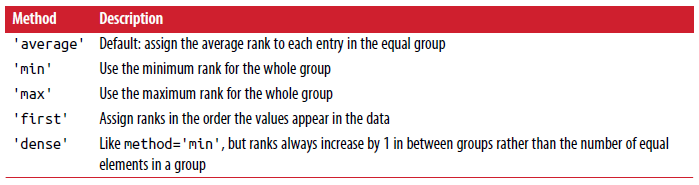
</p>

## Axis Indexes with Duplicate Labels

Up until now all of the examples we’ve looked at have had unique axis labels (index values)

While many pandas functions (like reindex) require that the labels be unique, it’s not mandatory

Let's consider a small Series with duplicate indices:

In [218]:
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])

In [219]:
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

The index’ is_unique property can tell you whether its labels are unique or not:

In [220]:
obj.index.is_unique

False

Data selection is one of the main things that behaves differently with duplicates. Indexing a label with multiple entries returns a Series, while single entries return a scalar value:

In [221]:
obj['a']

a    0
a    1
dtype: int64

In [222]:
obj['c']

4

This can make your code more complicated, as the output type from indexing can vary based on whether a label is repeated or not

The same logic extends to indexing rows in a DataFrame:

In [223]:
df = pd.DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])

In [224]:
df

,0,1,2
a,0.363197,0.713520,0.997550
a,0.697521,1.544480,0.323171
b,-0.349299,-0.115164,-0.503092
b,-0.869821,0.344043,0.595767


In [225]:
df.loc['b']

,0,1,2
b,-0.349299,-0.115164,-0.503092
b,-0.869821,0.344043,0.595767


# 5.3 Summarizing and Computing Descriptive Statistics

pandas objects are equipped with a set of common mathematical and statistical methods

Most of these fall into the category of reductions or summary statistics, methods that extract a single value (like the sum or mean) from a Series or a Series of values from the rows or columns of a DataFrame

Compared with the similar methods found on NumPy arrays, they have **built-in handling for missing data.** Consider a small DataFrame:

In [226]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])

In [227]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


Calling DataFrame’s sum method returns a Series containing column sums:

In [228]:
df.sum()

one    9.25
two   -5.80
dtype: float64

Passing axis='columns' or axis=1 sums across the columns instead:

In [229]:
df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

NA values are excluded unless the entire slice (row or column in this case) is NA

This can be disabled with the skipna option:

In [230]:
df.mean(axis='columns', skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

See Table 5-7 for a list of common options for each reduction method
<p align='center'>
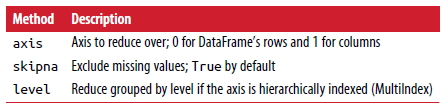
</p>

Some methods, like idxmin and idxmax, return indirect statistics like the index value where the minimum or maximum values are attained:

In [231]:
df.idxmax()

one    b
two    d
dtype: object

Other methods are accumulations:

In [232]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


Another type of method is neither a reduction nor an accumulation. describe is one such example, producing multiple summary statistics in one shot:

In [233]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


On non-numeric data, describe produces alternative summary statistics:

In [234]:
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)

In [235]:
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

See Table 5-8 for a full list of summary statistics and related methods

Table 5-8. Descriptive and summary statistics
<p align='center'>
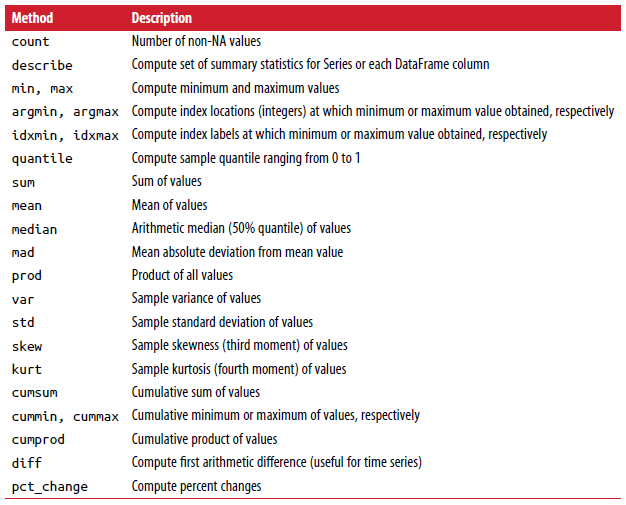
</p>


## Correlation and Covariance

Some summary statistics, like correlation and covariance, are computed from pairs of
arguments

Let’s consider some DataFrames of stock prices and volumes obtained from Yahoo! Finance using the add-on pandas-datareader package

In [236]:
import pandas_datareader.data as web
all_data = {ticker: web.get_data_yahoo(ticker)
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}
price = pd.DataFrame({ticker: data['Adj Close']
                      for ticker, data in all_data.items()})
volume = pd.DataFrame({ticker: data['Volume']
                       for ticker, data in all_data.items()})

In [239]:
price

,AAPL,IBM,MSFT,GOOG
Date,,,,
2016-09-26,26.465858,122.940903,52.645519,774.210022
2016-09-27,26.515097,125.168533,53.617004,783.010010
2016-09-28,26.716732,126.382088,53.691029,781.559998
2016-09-29,26.301737,126.238419,53.108139,775.010010
2016-09-30,26.505720,126.829239,53.293175,777.289978
...,...,...,...,...
2021-09-16,148.789993,136.429993,305.220001,2887.469971
2021-09-17,146.059998,135.229996,299.869995,2829.270020
2021-09-20,142.940002,134.309998,294.299988,2780.340088


I now compute percent changes of the prices

In [244]:
returns = price.pct_change()

In [245]:
returns.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2021-09-16,-0.001610,-0.005612,0.001312,-0.005733
2021-09-17,-0.018348,-0.008796,-0.017528,-0.020156
2021-09-20,-0.021361,-0.006803,-0.018575,-0.017294
2021-09-21,0.003428,-0.009977,0.001699,0.004528
2021-09-22,0.016872,0.012484,0.012822,0.009252


The corr method of Series computes the correlation of the overlapping, non-NA, aligned-by-index values in two Series 

Relatedly, cov computes the covariance:

In [253]:
returns['MSFT'].corr(returns['IBM'])

0.5150960143755831

In [254]:
returns['MSFT'].cov(returns['IBM'])

0.0001449159997221258

Since MSFT is a valid Python attribute, we can also select these columns using more concise syntax:

In [256]:
returns.MSFT.corr(returns.IBM)

0.5150960143755831

DataFrame’ corr and cov methods, on the other hand, return a full correlation or covariance matrix as a DataFrame, respectively:

In [257]:
returns.corr()

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.442041,0.737134,0.664354
IBM,0.442041,1.000000,0.515096,0.482614
MSFT,0.737134,0.515096,1.000000,0.774494
GOOG,0.664354,0.482614,0.774494,1.000000


In [258]:
returns.cov()

,AAPL,IBM,MSFT,GOOG
AAPL,0.000361,0.000138,0.000241,0.000213
IBM,0.000138,0.000268,0.000145,0.000133
MSFT,0.000241,0.000145,0.000295,0.000224
GOOG,0.000213,0.000133,0.000224,0.000284


Using DataFrame’s corrwith method, you can compute pairwise correlations between a DataFrame’s columns or rows with another Series or DataFrame

Passing a Series returns a Series with the correlation value computed for each column:


In [259]:
returns.corrwith(returns.IBM)

AAPL    0.442041
IBM     1.000000
MSFT    0.515096
GOOG    0.482614
dtype: float64

Passing a DataFrame computes the correlations of matching column names

Here I compute correlations of percent changes with volume:

In [265]:
returns.corrwith(volume)

AAPL   -0.077212
IBM    -0.103164
MSFT   -0.057358
GOOG   -0.122554
dtype: float64

## Unique Values, Value Counts, and Membership

Another class of related methods extracts information about the values contained in a one-dimensional Series

To illustrate these, consider this example:

In [266]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

The first function is unique, which gives you an array of the unique values in a Series:

In [268]:
uniques = obj.unique()

In [270]:
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

The unique values are not necessarily returned in sorted order, but could be sorted after the fact if needed (uniques. sort())

Relatedly, value_counts computes a Series containing value frequencies:

In [272]:
obj.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

The Series is sorted by value in descending order as a convenience

value_counts is also available as a top-level pandas method that can be used with any array or sequence:

In [275]:
pd.value_counts(obj.values, sort=False)

d    1
a    3
b    2
c    3
dtype: int64

**isin performs a vectorized set membership check** and can be useful in filtering a dataset down to a subset of values in a Series or column in a DataFrame:

In [276]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [277]:
mask = obj.isin(['b', 'c'])

In [278]:
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [282]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

Related to isin is the **Index.get_indexer method, which gives you an index array from an array of possibly non-distinct values into another array of distinct values:**

In [283]:
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a'])

In [284]:
unique_vals = pd.Series(['c', 'b', 'a'])

In [298]:
pd.Index(unique_vals).get_indexer(to_match)

array([0, 2, 1, 1, 0, 2])

In some cases, you may want to compute a histogram on multiple related columns in a DataFrame. Here’s an example:

In [295]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                     'Qu2': [2, 3, 1, 2, 3],
                     'Qu3': [1, 5, 2, 4, 4]})

In [296]:
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


Passing pandas.value_counts to this DataFrame’s apply function gives:

In [310]:
result = data.apply(pd.value_counts).fillna(0)

In [309]:
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,NaN,2.0,1.0
3,2.0,2.0,NaN
4,2.0,NaN,2.0
5,NaN,NaN,1.0


Here, the row labels in the result are the distinct values occurring in all of the columns

The values are the respective counts of these values in each column

See Table 5-9 for a reference on these methods

Table 5-9. Unique, value counts, and set membership methods
<p align='center'>
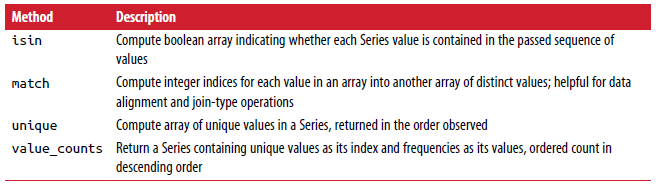
</p>